<a href="https://colab.research.google.com/github/Asad-Khan9/Exploratory-Data-Analysis-/blob/main/eda_assignment_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Mohammad Asad Khan
# 21BDS0334

In [55]:
import pandas as pd
df = pd.read_csv("EDA DATASET.csv")
df.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                338 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    object 
 5   Band Gap (eV)          338 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         338 non-null    object 
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 26.9+ KB


In [57]:
df.shape

(339, 11)

In [58]:
df.describe()

,Formation Energy (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume
count,339.000000,338.000000,339.000000,339.000000,339.000000
mean,-2.616950,2.082169,38.837758,2.984003,467.765619
std,0.183809,1.088661,23.133142,0.353968,292.674559
min,-2.985000,0.000000,10.000000,2.200000,122.581000
25%,-2.757500,1.266250,26.000000,2.760500,286.381500
50%,-2.605000,2.505500,31.000000,2.947000,358.537000
75%,-2.525500,2.968500,52.000000,3.106000,601.696500
max,-2.012000,3.823000,132.000000,4.201000,1518.850000


In [59]:
df.columns

Index(['Materials Id', 'Formula', 'Spacegroup', 'Formation Energy (eV)',
       'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)',
       'Volume', 'Has Bandstructure', 'Crystal System'],
      dtype='object')

# Module - 2 implementation

In [60]:
# Module - 2 Implementation

# creating a new dataframe (derived_df) with new columns derived from the columns of the original dataframe (df)

derived_df = pd.DataFrame()
derived_df["id"] = df["Materials Id"]
derived_df.shape


(339, 1)

In [61]:
derived_df["Energy_Efficieny"] = df["Formation Energy (eV)"] / df["Nsites"]
derived_df["Energy_Density"] = df["Formation Energy (eV)"] / df["Volume"]
derived_df["Specific Band Gap"] = df["Band Gap (eV)"] / df["Nsites"]
derived_df["Density-to-Volume Ratio"] = df["Density (gm/cc)"] / df["Volume"]
# derived_df["Hull Energy Ratio"] = df["E Above Hull (eV)"] / df["Formation Energy (eV)"]
derived_df.head()

,id,Energy_Efficieny,Energy_Density,Specific Band Gap,Density-to-Volume Ratio
0,mp-849394,-0.168687,-0.015119,0.216375,0.016766
1,mp-783909,-0.084250,-0.007381,0.089969,0.008010
2,mp-761311,-0.099107,-0.009196,0.130464,0.009149
3,mp-761598,-0.073237,-0.006380,0.079342,0.006667
4,mp-767709,-0.076306,-0.006521,0.071611,0.007914


In [62]:
merged_df = pd.merge(df,derived_df, left_on="Materials Id", right_on = "id", how = "inner")
merged_df = merged_df.drop(columns=['id']).rename(columns={'materials_id': 'id'})
merged_df.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Energy_Efficieny,Energy_Density,Specific Band Gap,Density-to-Volume Ratio
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic,-0.168687,-0.015119,0.216375,0.016766
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic,-0.084250,-0.007381,0.089969,0.008010
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic,-0.099107,-0.009196,0.130464,0.009149
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic,-0.073237,-0.006380,0.079342,0.006667
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic,-0.076306,-0.006521,0.071611,0.007914


In [63]:
merged_df.shape

(339, 15)

In [64]:
merged_df.duplicated().sum() # there are 0 duplicated rows in this dataframe

0

In [65]:
column_s_rows_duplicated = {}
columns_ = list(merged_df.columns)
for i in columns_:
    # column_s_rows_duplicated[i] = merged_df[merged_df[i].duplicated()].shape[0]
    key = i
    value = merged_df[i].duplicated().sum()
    column_s_rows_duplicated[key] = value

column_s_rows_duplicated

# this shows the number of duplicated values in each column of the dataframe

{'Materials Id': 0,
 'Formula': 224,
 'Spacegroup': 295,
 'Formation Energy (eV)': 88,
 'E Above Hull (eV)': 230,
 'Band Gap (eV)': 32,
 'Nsites': 290,
 'Density (gm/cc)': 39,
 'Volume': 0,
 'Has Bandstructure': 337,
 'Crystal System': 334,
 'Energy_Efficieny': 15,
 'Energy_Density': 0,
 'Specific Band Gap': 19,
 'Density-to-Volume Ratio': 0}

In [66]:
# total number of null values in each columns
merged_df.isnull().sum()

,0
Materials Id,0
Formula,1
Spacegroup,0
Formation Energy (eV),0
E Above Hull (eV),0
Band Gap (eV),1
Nsites,0
Density (gm/cc),0
Volume,0
Has Bandstructure,0


In [67]:
# total number of null values in the entire dataset
merged_df.isnull().sum().sum()

4

In [68]:
rows_with_nulls = merged_df[merged_df.isnull().any(axis=1)]
rows_with_nulls

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Energy_Efficieny,Energy_Density,Specific Band Gap,Density-to-Volume Ratio
24,mp-767303,Li2Mn(SiO3)2,C2,-2.778,0.085,3.169,22,2.920,251.377,True,NaN,-0.126273,-0.011051,0.144045,0.011616
79,mp-765416,NaN,C2,-2.955,0.063,3.031,31,2.711,400.680,True,monoclinic,-0.095323,-0.007375,0.097774,0.006766
80,mp-762723,Li3Fe2(SiO4)2,P21,-2.561,0.063,NaN,30,2.943,357.383,False,monoclinic,-0.085367,-0.007166,NaN,0.008235


In [69]:
# merged_df.isnull()

In [70]:
# merged_df["Crystal System"].iloc[20:30]
columns_with_question_mark = []

# Iterate through all columns in the DataFrame
for col in merged_df.columns:
    # Check if the column contains any "?"
    if merged_df[col].isin(["?"]).any():
        columns_with_question_mark.append(col)

print("Columns with '?':", columns_with_question_mark)

Columns with '?': ['E Above Hull (eV)', 'Crystal System']


In [71]:
# Get the indices of rows where any column contains "?"
indices_with_question_mark = merged_df[merged_df.isin(["?"]).any(axis=1)].index
merged_df.iloc[indices_with_question_mark]

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Energy_Efficieny,Energy_Density,Specific Band Gap,Density-to-Volume Ratio
88,mp-762562,Li2Fe(Si2O5)2,P21/m,-2.898,?,3.171,68,2.518,902.44,True,monoclinic,-0.042618,-0.003211,0.046632,0.002790
89,mp-761782,Li7Fe3(SiO6)2,C2/m,-2.409,0.078,1.658,24,3.692,208.83,True,?,-0.100375,-0.011536,0.069083,0.017679


In [72]:
# therefore, it is noticed that the dataset contains null values in 2 forms;
# NaN values and "?" values.
# since, the dataset is small, and the null values are very few, it is best to
# deal with null values by filling them instead of dropping them.

In [73]:
# filling NaN values

merged_df.iloc[20:30]

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Energy_Efficieny,Energy_Density,Specific Band Gap,Density-to-Volume Ratio
20,mp-761653,Li2MnSi3O8,P21,-2.871,0.082,2.736,28,2.672,349.386,True,monoclinic,-0.102536,-0.008217,0.097714,0.007648
21,mp-769543,Li3Mn2(SiO4)2,P21,-2.612,0.083,0.000,30,2.887,362.254,True,monoclinic,-0.087067,-0.007210,0.000000,0.007970
22,mp-849217,Li4Mn(SiO3)3,C2,-2.794,0.083,2.862,34,2.649,389.814,True,monoclinic,-0.082176,-0.007168,0.084176,0.006796
23,mp-767695,Li2MnSi3O8,P21,-2.868,0.085,3.261,28,2.628,355.180,True,monoclinic,-0.102429,-0.008075,0.116464,0.007399
24,mp-767303,Li2Mn(SiO3)2,C2,-2.778,0.085,3.169,22,2.920,251.377,True,NaN,-0.126273,-0.011051,0.144045,0.011616
25,mp-780037,LiMn2Si2O7,Cc,-2.653,0.085,0.716,24,3.281,288.498,True,monoclinic,-0.110542,-0.009196,0.029833,0.011373
26,mp-774171,Li3Mn2(SiO4)2,Pc,-2.608,0.087,0.000,30,2.892,361.543,True,monoclinic,-0.086933,-0.007214,0.000000,0.007999
27,mp-778631,Li3Mn2(SiO4)2,Pc,-2.607,0.087,0.370,30,2.911,359.241,True,monoclinic,-0.086900,-0.007257,0.012333,0.008103
28,mp-780872,LiMnSiO4,P21/c,-2.589,0.088,0.982,56,3.361,608.454,True,monoclinic,-0.046232,-0.004255,0.017536,0.005524
29,mp-761765,Li3Mn3SiO8,P2/m,-2.329,0.088,0.915,15,3.853,147.276,True,monoclinic,-0.155267,-0.015814,0.061000,0.026162


In [74]:
# Handling Missing Values in the "Crystal System" Column
# The "Crystal System" column contains three distinct values: "monoclinic", "orthorhombic", and "triclinic".
# The data in this column is segmented into contiguous blocks:
# - Rows 0-140: "monoclinic"
# - Rows 141-268: "orthorhombic"
# - Rows 269-end: "triclinic"
# Missing values (NaN) and "?" are observed only within the "monoclinic" segment (Rows 0-140).

# - Since the missing values are confined to the "monoclinic" segment,
# it is logical to replace them with "monoclinic".

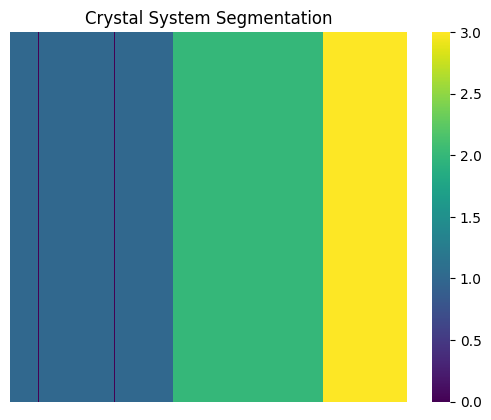

In [75]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

system_map = {"monoclinic": 1, "orthorhombic": 2, "triclinic": 3, "NaN": 0, "?": 0}
mapped_values = merged_df["Crystal System"].map(system_map).fillna(0)

sns.heatmap(
    np.array([mapped_values]),
    cmap="viridis",
    cbar=True,
    xticklabels=False,
    yticklabels=False
)
plt.title("Crystal System Segmentation")
plt.show()


In [76]:
# Heatmap shows two dark lines in the blue "monoclinic" segment, representing NaN and "?" values.
# These confirm missing values are localized to the "monoclinic" section, justifying their replacement with "monoclinic."

In [77]:
merged_df["Crystal System"] = merged_df["Crystal System"].fillna("monoclinic")

In [78]:
merged_df["Crystal System"] = merged_df["Crystal System"].replace("?", "monoclinic")

In [79]:
merged_df["Crystal System"].unique()

array(['monoclinic', 'orthorhombic', 'triclinic'], dtype=object)

In [80]:
rows_with_nulls = merged_df[merged_df.isnull().any(axis=1)]
rows_with_nulls

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Energy_Efficieny,Energy_Density,Specific Band Gap,Density-to-Volume Ratio
79,mp-765416,NaN,C2,-2.955,0.063,3.031,31,2.711,400.680,True,monoclinic,-0.095323,-0.007375,0.097774,0.006766
80,mp-762723,Li3Fe2(SiO4)2,P21,-2.561,0.063,NaN,30,2.943,357.383,False,monoclinic,-0.085367,-0.007166,NaN,0.008235


In [81]:
# Fill NaN values with the mean of the column
merged_df['Band Gap (eV)'] = merged_df['Band Gap (eV)'].fillna(merged_df['Band Gap (eV)'].mean())

In [82]:
# Check for any remaining NaN values
print(merged_df['Band Gap (eV)'].isna().sum())

0


In [83]:
rows_with_nulls = merged_df[merged_df.isnull().any(axis=1)]
rows_with_nulls

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Energy_Efficieny,Energy_Density,Specific Band Gap,Density-to-Volume Ratio
79,mp-765416,NaN,C2,-2.955,0.063,3.031000,31,2.711,400.680,True,monoclinic,-0.095323,-0.007375,0.097774,0.006766
80,mp-762723,Li3Fe2(SiO4)2,P21,-2.561,0.063,2.082169,30,2.943,357.383,False,monoclinic,-0.085367,-0.007166,NaN,0.008235


In [84]:
merged_df["Specific Band Gap"].iloc[75:85]  #examining values in the proximity of the NaN value

,Specific Band Gap
75,0.184786
76,0.050367
77,0.097393
78,0.053838
79,0.097774
80,NaN
81,0.092000
82,0.032571
83,0.064100
84,0.038643


In [85]:
merged_df["Specific Band Gap"].mean() # since, the mean is close enough to the values in the proximiyt of the NaN value
# mean imputation is good enough

0.07013101845586198

In [86]:
# Fill NaN values with the mean of the column
merged_df['Specific Band Gap'] = merged_df['Specific Band Gap'].fillna(merged_df['Specific Band Gap'].mean())

In [87]:
rows_with_nulls = merged_df[merged_df.isnull().any(axis=1)]
rows_with_nulls

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Energy_Efficieny,Energy_Density,Specific Band Gap,Density-to-Volume Ratio
79,mp-765416,NaN,C2,-2.955,0.063,3.031,31,2.711,400.68,True,monoclinic,-0.095323,-0.007375,0.097774,0.006766


In [88]:
merged_df["Formula"].iloc[74:84]  #examining values in the proximity of the NaN value
# since, this particular column is related to chemical formulas, it is better to drop the row instead of replacing it with the
# most occuring chemical formula of the column as it can hinder with the meaning of the dataset.

,Formula
74,LiFeSiO4
75,LiFeSiO4
76,Li3Fe2(SiO4)2
77,LiFeSiO4
78,Li2Fe(Si2O5)2
79,NaN
80,Li3Fe2(SiO4)2
81,LiFeSiO4
82,LiFeSiO4
83,Li3Fe2(SiO4)2


In [89]:
merged_df = merged_df.drop(79) # dropping the row with NaN value (79th row)
merged_df = merged_df.drop(89) # dropping the row with NaN value (79th row)

In [90]:
rows_with_nulls = merged_df[merged_df.isnull().any(axis=1)]
rows_with_nulls

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Energy_Efficieny,Energy_Density,Specific Band Gap,Density-to-Volume Ratio


In [91]:
# in addition to this, there are also several 0 values in "Band Gap (eV)" column.
zero_count = sum(merged_df['Band Gap (eV)'] == 0)
zero_count

17

In [92]:
# Convert zeros to NaN
merged_df['Band Gap (eV)'] = merged_df['Band Gap (eV)'].replace(0, np.nan)

# median imputation on NaN values
merged_df['Band Gap (eV)'] = merged_df['Band Gap (eV)'].fillna(merged_df['Band Gap (eV)'].median())
zero_count = sum(merged_df['Band Gap (eV)'] == 0)
zero_count # no more 0s in this column

0

# Module - 3 implementation (Univariate, Bivariate and Multivariate Analysis)


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


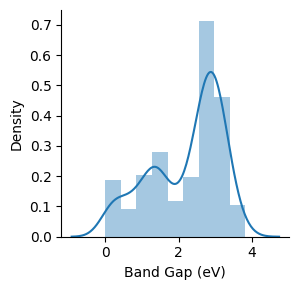

In [93]:
# Univariate Analysis
# distplot
import seaborn as sns
sns.FacetGrid(merged_df).map(sns.distplot,"Band Gap (eV)").add_legend()


In [94]:
# in the above univariate analysis of Band Gap, we can observe that the distribution appears to be right-skewed,
# meaning there are more lower band gap values and fewer high ones.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


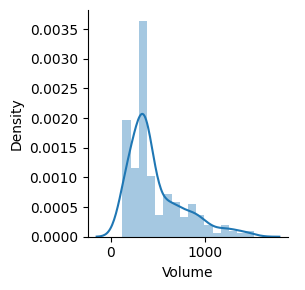

In [95]:
sns.FacetGrid(merged_df).map(sns.distplot,"Volume").add_legend()

In [96]:
# in the above univariate analysis of Volume, we can observe that the distribution is
#right-skewed (positively skewed), meaning most values are concentrated towards the lower end, with a few high-volume outliers.

# There is a sharp peak at a lower volume value, indicating a common material size range in the dataset.

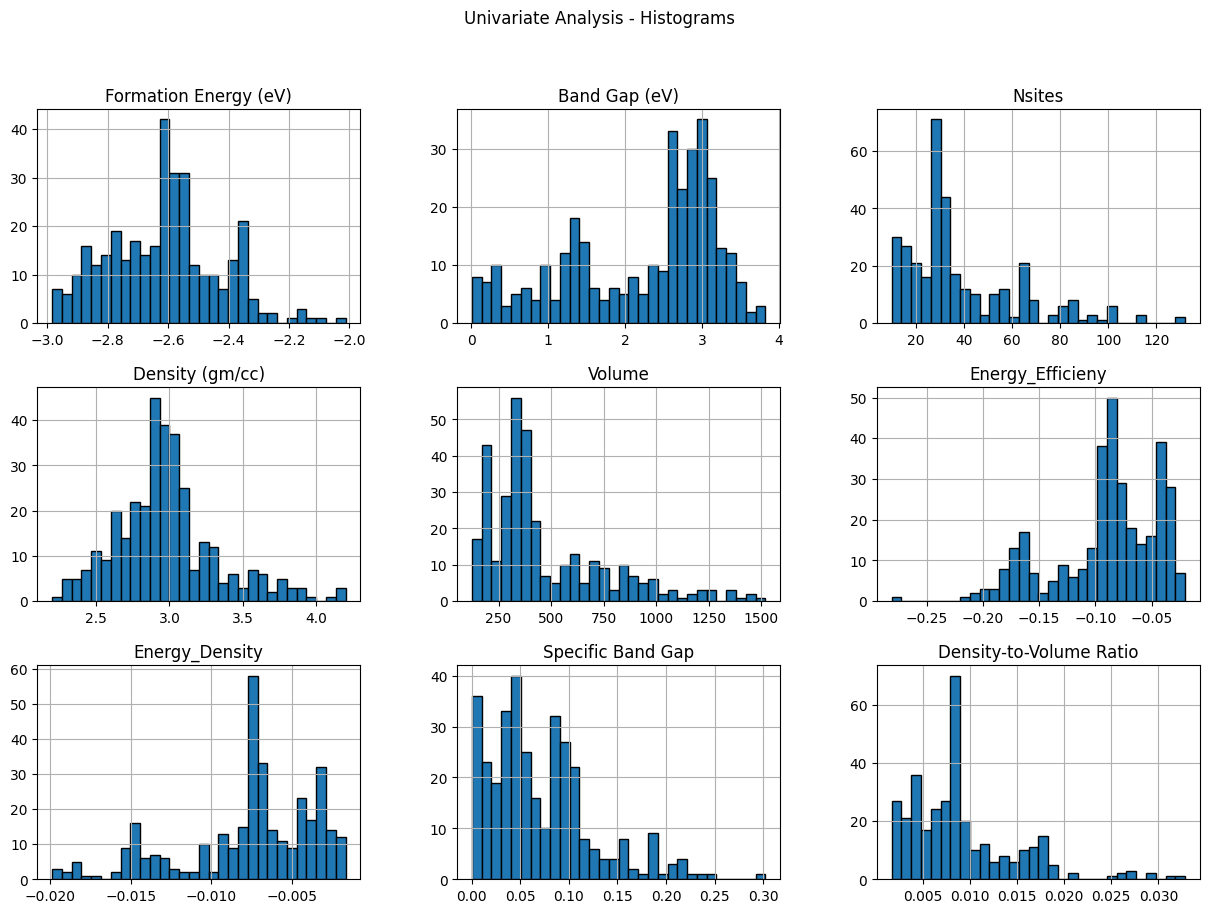

In [97]:
# Histogram

import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites',
    'Density (gm/cc)', 'Volume', 'Energy_Efficieny', 'Energy_Density',
    'Specific Band Gap', 'Density-to-Volume Ratio']
# Histograms for each numerical column
merged_df[numerical_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Univariate Analysis - Histograms")
plt.show()

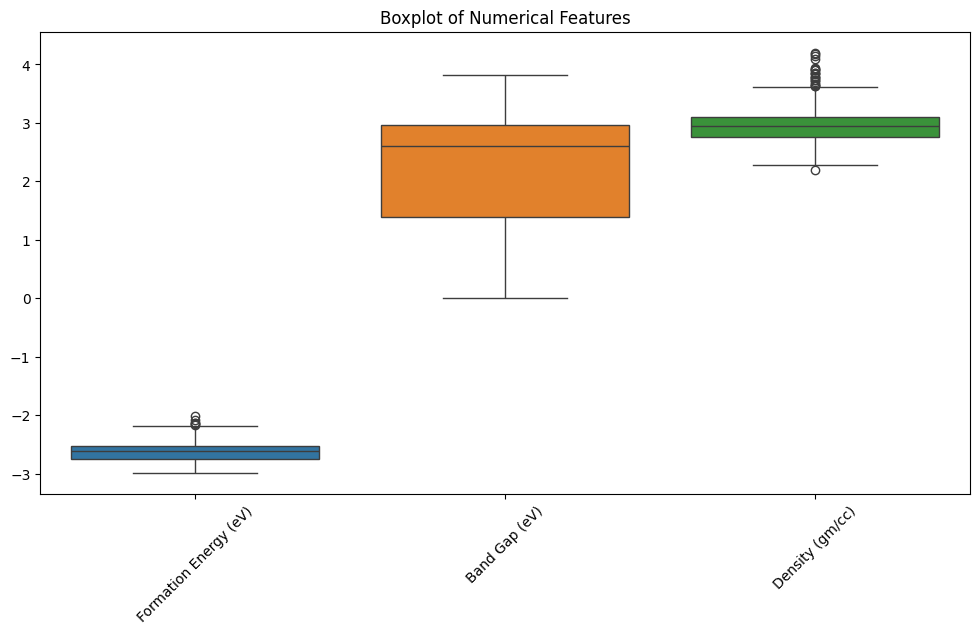

In [98]:
# Bivariate Analysis
# Boxplot for numerical columns to check for outliers

boxplot_cols = ['Formation Energy (eV)', 'Band Gap (eV)',
    'Density (gm/cc)']
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df[boxplot_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()


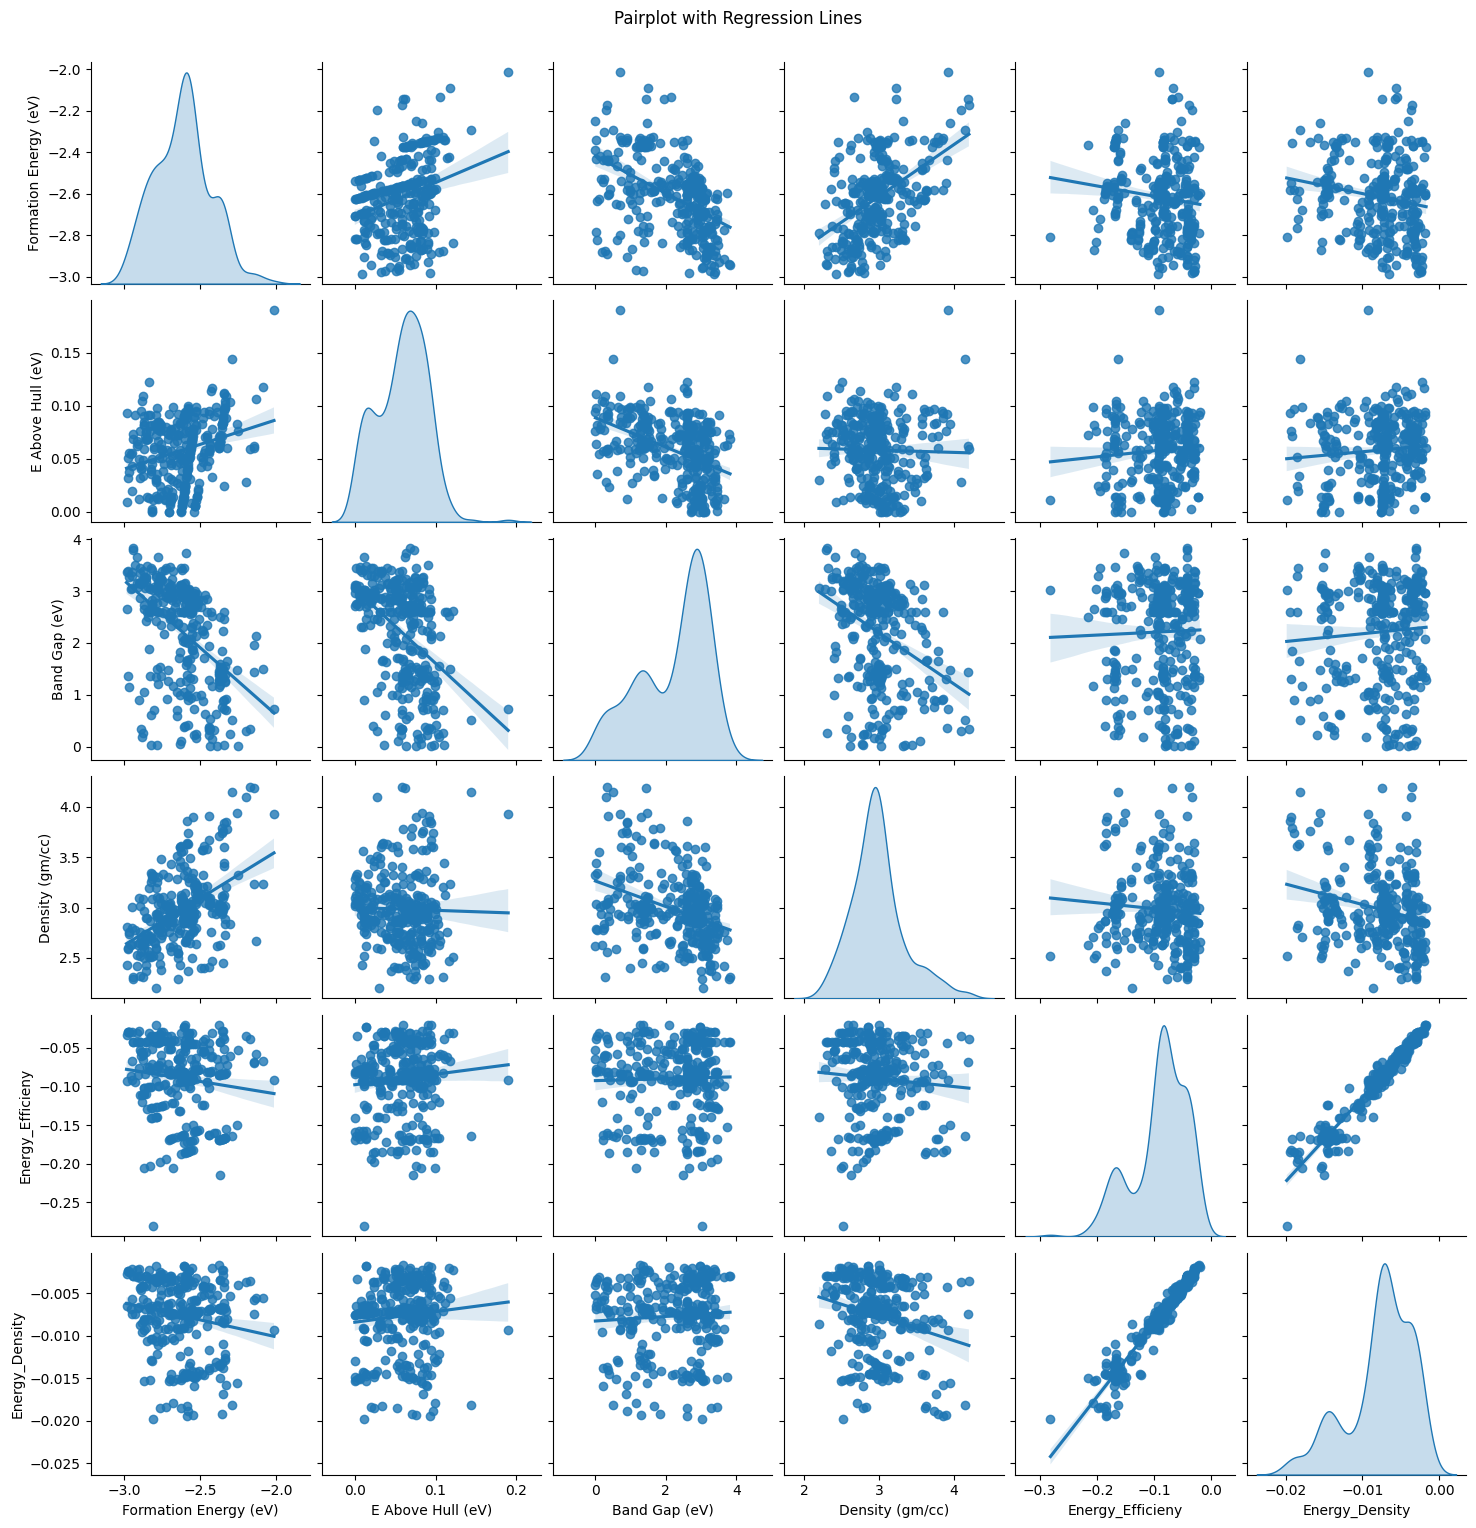

In [99]:
# Multivariate Analysis
# pairplot with regression lines
selected_features = [
    'Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)',
    'Density (gm/cc)', 'Energy_Efficieny', 'Energy_Density'
]

merged_df[selected_features] = merged_df[selected_features].apply(pd.to_numeric, errors='coerce')
sns.pairplot(merged_df, vars=selected_features, kind="reg", diag_kind="kde")

plt.suptitle("Pairplot with Regression Lines", y=1.02)
plt.show()


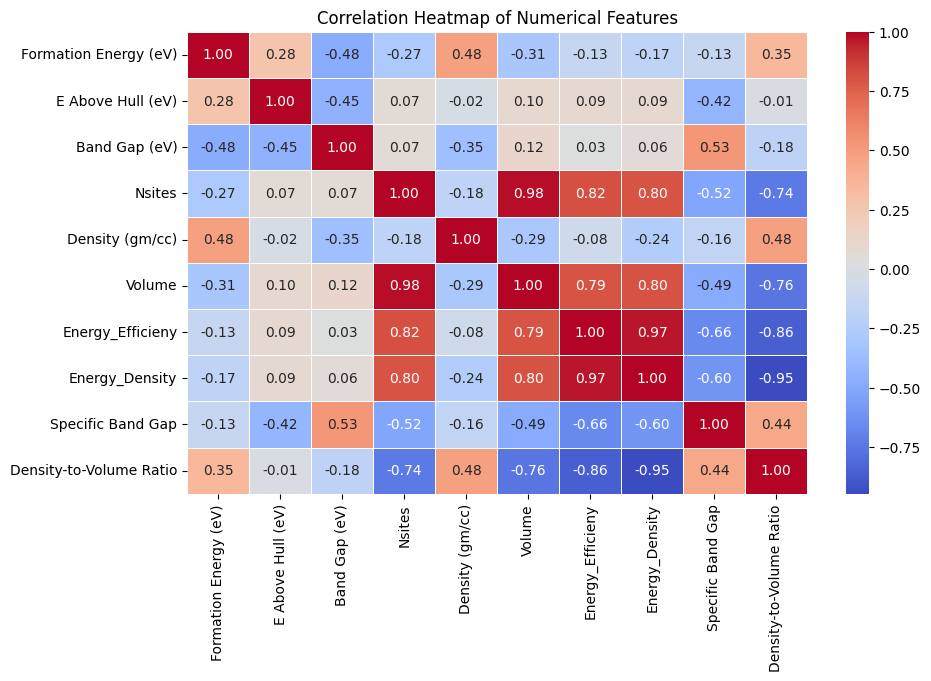

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = merged_df.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()
